# Homework 3

Run the cell below to import the libraries you might need for this homework. Add any libraries you think you will need, then use methods from class to answer the following questions.

In [1]:
%matplotlib inline
import numpy as np
from datascience import *
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## 1. Birth Rates


The following table gives census-based population estimates for each state on July 1, 2015 and July 1, 2016. The last four columns describe the components of the estimated change in population during this time interval. *For all questions below, assume that the word "states" refers to all 52 rows including Puerto Rico & the District of Columbia.* Run the cell below to get the table in the correct format, upon which this problem is based.

In [3]:
# Don't change this cell; just run it.
# From http://www2.census.gov/programs-surveys/popest/datasets/2010-2016/national/totals/nst-est2016-alldata.csv
# See http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/totals/nst-est2015-alldata.pdf
#     for column descriptions. (As of Feb 2017, no descriptions were posted for 2010-2016.)
pop = Table.read_table('nst-est2016-alldata.csv').where('SUMLEV', 40).select([1, 4, 12, 13, 27, 34, 62, 69])
pop = pop.relabeled(2, '2015').relabeled(3, '2016')
pop = pop.relabeled(4, 'BIRTHS').relabeled(5, 'DEATHS')
pop = pop.relabeled(6, 'MIGRATION').relabeled(7, 'OTHER')
pop.set_format([2, 3, 4, 5, 6, 7], NumberFormatter(decimals=0)).show(5)

/Users/apple/anaconda3/lib/python3.6/site-packages/datascience/tables.py:132: FutureWarning: read_table is deprecated, use read_csv instead.
  df = pandas.read_table(filepath_or_buffer, *args, **vargs)


**Question 1 (3 points).** The annual birth rate for a year-long period is the number of births in that period as a proportion of the population at the start of the period. Which state had the least birth rate?

In [9]:
birth=pop.with_column('birth rate',pop.column('BIRTHS')/pop.column('2015'))
birth.sort('birth rate').take(0)

REGION | NAME        | 2015      | 2016      | BIRTHS | DEATHS | MIGRATION | OTHER | birth rate
X      | Puerto Rico | 3,473,181 | 3,411,307 | 30,991 | 28,108 | -64,757   | 0     | 0.00892294

It's Puerto Rico

**Question 2 (5 points).** Give a table that holds information about the states that had more deaths than births.
*Hint: This question requires a method that we used in class. However, this method should be used differently. Remember that to learn about any method and its possible arguments, you may type the method name followed by a "?" as shown below. Think of the method that you want to use first, then read about it.*

In [10]:
pop.select('NAME','BIRTHS','DEATHS').where(pop.column('BIRTHS')-pop.column('DEATHS'),are.below(0))
#We chose just an arbitrary method here to remind you how to learn about different methods

NAME          | BIRTHS | DEATHS
Maine         | 12,542 | 13,842
West Virginia | 19,799 | 22,479

**Question 3 (4 points).** The annual rate of migration for a year-long period is the net number of migrations (in and out) as a proportion of the population at the start of the period. The `MIGRATION` column contains estimated annual net migration counts by state. Write a function called `displayHighestMovers`, which takes a table as input and returns as output an array holding the names of states with annual rate of migration was higher than 1%. The array should display the name of these states in the order of their corresponding annual rate of migration from highest to lowest.

In [14]:
def displayHighestMovers(tab):
    mig='MIGRATION'
    pop='2015'
    res=tab.with_column('MIGRATION RATE',tab.column(mig)/tab.column(pop))
    res=res.where(res.column('MIGRATION RATE'),are.above(0.01)).sort('MIGRATION RATE',descending=True)
    return res.column('NAME')
rate = displayHighestMovers(pop)
rate

array(['Florida', 'Nevada', 'Oregon', 'Washington', 'Idaho', 'Arizona',
       'Colorado', 'South Carolina'], dtype='<U20')

**Question 4 (2 points).** Construct a table that gives the total number of births in each region.

In [18]:
birth_tab=Table().with_column('REGION',pop.column('REGION'),'TOTAL BIRTHS',pop.column('BIRTHS')).group('REGION',sum)
birth_tab

REGION | TOTAL BIRTHS sum
1      | 629063
2      | 828188
3      | 1540837
4      | 979657
X      | 30991

**Question 5 (2 points).** How many states had a total population in 2016 that was smaller than the total number of babies born in region 4?

In [24]:
#get total number of babies born in region 4
bi=birth_tab.where('REGION',are.equal_to('4')).column('TOTAL BIRTHS sum')
bi[0]

979657

In [31]:
small=pop.where('2016',are.below(bi[0]))
ans=len(list(small.column(0)))
print('Answer:',ans)

Answer: 7


**Question 6 (4 points).** Was there an association between birth rate and death rate during this time interval? Support your conclusion with a chart. If an association exists, what might explain it? 

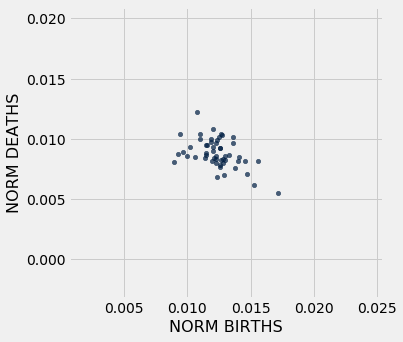

In [50]:
normal=pop.with_column('NORM BIRTHS',pop.column('BIRTHS')/pop.column('2015'),'NORM DEATHS',pop.column('DEATHS')/pop.column('2015'))
normal.scatter('NORM BIRTHS','NORM DEATHS')

As birth rate goes up, death rate goes down.

## 2. Consumer Financial Protection Bureau Complaints


The Consumer Financial Protection Bureau has collected and published consumer complaints against financial companies since 2011.  These financial companies offer a variety of products. The data are available [here](https://dev.socrata.com/foundry/data.consumerfinance.gov/jhzv-w97w) (or at this [direct link](https://data.consumerfinance.gov/resource/jhzv-w97w.csv)). 

**Question 1 (2 points).** Read in the data and keep the complaints from 2016 only.

In [4]:
comp=Table.read_table('cc_2016_final.csv')

In [5]:
comp=comp.where(comp.column('Date received'),are.between_or_equal_to('1/1/16', '12/31/16'))
comp

Date received | Product         | Sub-product                        | Issue                                 | Sub-issue                             | Consumer complaint narrative                                 | Company public response                                      | Company                           | State | ZIP code | Tags | Consumer consent provided? | Submitted via | Date sent to company | Company response to consumer    | Timely response? | Consumer disputed? | Complaint ID
12/31/16      | Debt collection | Medical                            | Improper contact or sharing of info   | Talked to a third party about my debt | nan                                                          | Company believes it acted appropriately as authorized by ... | AmeriCollect                      | FL    | 32068    | nan  | Consent not provided       | Web           | 12/31/16             | Closed with explanation         | Yes              | No                 | 2270572
12/31/16      | Consumer Loan   | Vehicle loan                       | Managing the loan or lease            | nan                                   | nan                                                          | nan                                                          | TOYOTA MOTOR CREDIT CORPORATION   | PA    | 18020    | nan  | Consent not provided       | Web           | 12/31/16             | Closed with explanation         | Yes              | No                 | 2270662
12/31/16      | Consumer Loan   | Installment loan                   | Taking out the loan or lease          | nan                                   | nan                                                          | nan                                                          | DISCOVER BANK                     | OH    | 44138    | nan  | Consent not provided       | Web           | 1/3/17               | Closed with explanation         | Yes              | No                 | 2270746
12/31/16      | Credit card     | nan                                | Delinquent account                    | nan                                   | nan                                                          | Company has responded to the consumer and the CFPB and c ... | SYNCHRONY FINANCIAL               | TX    | 77471    | nan  | Consent not provided       | Web           | 12/31/16             | Closed with non-monetary relief | Yes              | No                 | 2270618
12/31/16      | Credit card     | nan                                | Identity theft / Fraud / Embezzlement | nan                                   | nan                                                          | nan                                                          | CAPITAL ONE FINANCIAL CORPORATION | NY    | 10466    | nan  | Consent not provided       | Web           | 12/31/16             | Closed with explanation         | Yes              | No                 | 2270636
12/31/16      | Student loan    | Federal student loan servicing     | Dealing with my lender or servicer    | Having problems with customer service | nan                                                          | Company believes it acted appropriately as authorized by ... | GREAT LAKES                       | AZ    | 85142    | nan  | Consent not provided       | Web           | 1/3/17               | Closed with explanation         | Yes              | No                 | 2270784
12/31/16      | Mortgage        | Home equity loan or line of credit | Credit decision / Underwriting        | nan                                   | nan                                                          | nan                                                          | PNC Bank N.A.                     | NJ    | 7032     | nan  | Consent not provided       | Web           | 12/31/16             | Closed with explanation         | Yes              | No                 | 2270626
12/31/16      | Consumer Loan   | Installment loan                   | Taking out t

In [17]:
#size of comp
length=len(list(comp.column(0)))
length

10577

**Question 2 (5 points).** Draw a sorted bar chart that shows the number of complaints per product in descending order.

In [9]:
per=comp.select('Product','Complaint ID').group('Product')
per

Product                 | count
Bank account or service | 1215
Consumer Loan           | 1025
Credit card             | 2284
Credit reporting        | 2455
Debt collection         | 2224
Money transfers         | 139
Mortgage                | 470
Other financial service | 34
Payday loan             | 105
Prepaid card            | 118
... (2 rows omitted)

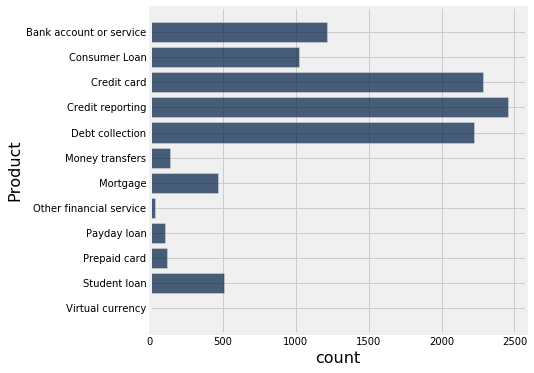

In [10]:
per.barh('Product','count')

**Question 3 (4 points).** Construct a table that summarizes the number of complaints per company and decide whether it's a good idea to draw a bar chart of that data. Explain your answer.

In [13]:
company=comp.select('Company','Complaint ID').group('Company').column('Company')
print('Num of companies:',len(list(company)))

Num of companies: 576


It's NOT a good idea, since there are too many companies(576).

**Question 4 (4 points).** We denote ${rf}_c$ as the [relative frequency](https://www.mathsisfun.com/data/relative-frequency.html) of complaints made for company c. Draw a bar chart of the 10 companies with highest ${rf}_c$.

**Note:** Graphs aren't very useful without accurate labels.  Make sure that the text on the horizontal axis of the graph makes sense.

In [24]:
hi10=comp.select('Company','Complaint ID').group('Company')

In [25]:
hi10=hi10.with_column('FREQUENCY',hi10.column('count')/length).sort('FREQUENCY',descending=True).take(np.arange(10))
hi10

Company                             | count | FREQUENCY
Experian Information Solutions Inc. | 2321  | 0.219438
WELLS FARGO & COMPANY               | 829   | 0.0783776
JPMORGAN CHASE & CO.                | 802   | 0.0758249
CAPITAL ONE FINANCIAL CORPORATION   | 582   | 0.0550251
SYNCHRONY FINANCIAL                 | 473   | 0.0447197
AMERICAN EXPRESS COMPANY            | 302   | 0.0285525
U.S. BANCORP                        | 241   | 0.0227853
DISCOVER BANK                       | 218   | 0.0206108
ENCORE CAPITAL GROUP INC.           | 201   | 0.0190035
PORTFOLIO RECOVERY ASSOCIATES INC   | 195   | 0.0184362

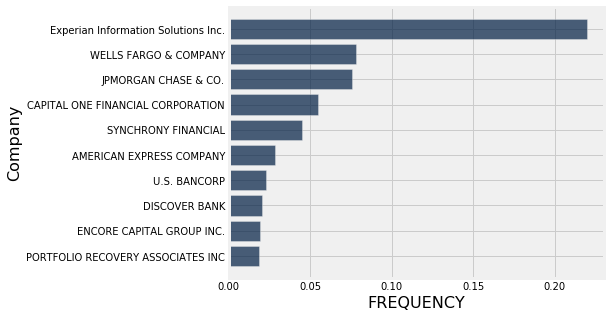

In [26]:
hi10.barh('Company','FREQUENCY')

## 3. Text Analysis (15 points)


Go to the website gutenberg.org (as done in lecture).
1. Choose a book or books to download (other than the ones already dicussed) and parse it the way you like.
2. Formulate an interesting question about your book(s). You could be exploring a certain aspect of one book or comparing a certain aspect across different books. 
3. Analyze the data to answer your question.
4. If applicable, mention one thing about the data, that if collected, would have helped you do better analysis.

Be sure to generate at least one chart or graph that helps you answer your question.

**Note:** This question is opened ended. There is no one right or wrong answer. 
    It mimics what happens in real life with data science. You often get 
    dry data and need to see what you can interpret out of the provided data,
    then possibly suggest what kind of extra data you wish to collect to make more useful comments.   Remember that you are doing science, and try to come up with a question that is both interesting, and requires a non-trivial amount of work to answer.
    

1. Book Selected: Alice’s Adventures in Wonderland by Lewis Carroll

In [31]:
import re
from urllib.request import urlopen #library for reading urls

In [34]:
alice_url='http://www.gutenberg.org/files/11/11-0.txt'
alice_chapters = re.sub('\\s+', ' ', urlopen(alice_url).read().decode()).split('CHAPTER ')[1:]
alice_data = Table().with_columns('Alice', alice_chapters)
alice_data

Alice
I. Down the Rabbit-Hole Alice was beginning to get very  ...
II. The Pool of Tears ‘Curiouser and curiouser!’ cried A ...
III. A Caucus-Race and a Long Tale They were indeed a qu ...
IV. The Rabbit Sends in a Little Bill It was the White R ...
V. Advice from a Caterpillar The Caterpillar and Alice l ...
VI. Pig and Pepper For a minute or two she stood looking ...
VII. A Mad Tea-Party There was a table set out under a t ...
VIII. The Queen’s Croquet-Ground A large rose-tree stood ...
IX. The Mock Turtle’s Story ‘You can’t think how glad I  ...
X. The Lobster Quadrille The Mock Turtle sighed deeply,  ...
... (2 rows omitted)

2. Question: What kind of moves are rarely written in the book? What can we tell about the stressness of the book from the moves appeared?

In [39]:

move=Table().with_columns(
    'Chapter',np.arange(1,13),
    'Run',np.char.count(alice_chapters,'run')+np.char.count(alice_chapters,'ran')+np.char.count(alice_chapters,'running')+np.char.count(alice_chapters,'runs')+np.char.count(alice_chapters,'escape')+np.char.count(alice_chapters,'escaped')+np.char.count(alice_chapters,'escaping')+np.char.count(alice_chapters,'escapes'),
    'Walk',np.char.count(alice_chapters,'walk')+np.char.count(alice_chapters,'walked')+np.char.count(alice_chapters,'walking')+np.char.count(alice_chapters,'walks'),
    'Jump',np.char.count(alice_chapters,'jump')+np.char.count(alice_chapters,'jumped')+np.char.count(alice_chapters,'jumping')+np.char.count(alice_chapters,'jumps'),
    'Wave',np.char.count(alice_chapters,'wave')+np.char.count(alice_chapters,'waved')+np.char.count(alice_chapters,'waving')+np.char.count(alice_chapters,'waves'),
    'Swim',np.char.count(alice_chapters,'swim')+np.char.count(alice_chapters,'swam')+np.char.count(alice_chapters,'swimming')+np.char.count(alice_chapters,'swims'),
    'Wander',np.char.count(alice_chapters,'wander')+np.char.count(alice_chapters,'wandered')+np.char.count(alice_chapters,'wandering')+np.char.count(alice_chapters,'wanders'),
    'Look',np.char.count(alice_chapters,'look')+np.char.count(alice_chapters,'looked')+np.char.count(alice_chapters,'looking')+np.char.count(alice_chapters,'looks')+np.char.count(alice_chapters,'see')+np.char.count(alice_chapters,'saw')+np.char.count(alice_chapters,'seeing')+np.char.count(alice_chapters,'sees')
)
move    
    

Chapter | Run  | Walk | Jump | Wave | Swim | Wander | Look
1       | 5    | 5    | 2    | 0    | 0    | 1      | 30
2       | 3    | 1    | 0    | 0    | 9    | 0      | 21
3       | 4    | 4    | 0    | 0    | 0    | 0      | 21
4       | 14   | 1    | 2    | 0    | 1    | 2      | 30
5       | 2    | 0    | 0    | 0    | 0    | 2      | 23
6       | 10   | 5    | 4    | 2    | 0    | 0      | 36
7       | 1    | 4    | 2    | 0    | 0    | 0      | 24
8       | 10   | 8    | 4    | 0    | 0    | 2      | 49
9       | 1    | 6    | 0    | 0    | 0    | 0      | 19
10      | 7    | 1    | 2    | 1    | 0    | 0      | 14
... (2 rows omitted)

Text(0.5, 1.08, 'Types of Moves')

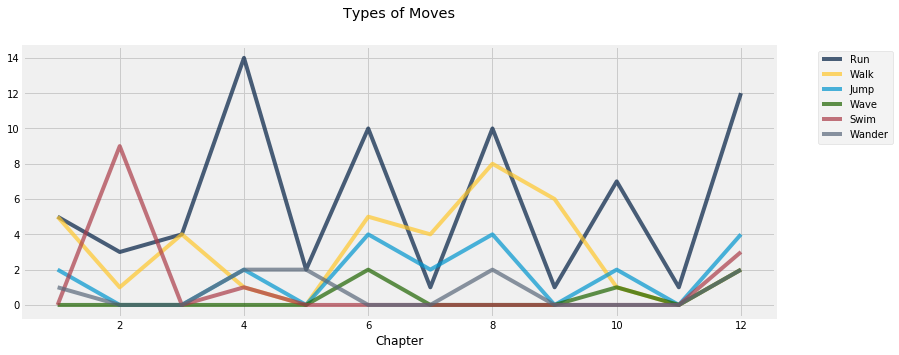

In [41]:
move.plot(column_for_xticks = 0, select = np.arange(1,7), width = 12, height = 5)
plt.title('Types of Moves', y=1.08)

3. Analization: 
    Swimming and wander rarely appears in the book.
    And it seems that chapter 4,8 and 12 are more stressed ,as more 'fierce' moves such as running and jumping appear in the chapter.

4. It would be helpful if the character that makes the corresponding move are recorded, to better analyze the stressness of the book.